In [5]:
pip install shap

     |████████████████████████████████| 356 kB 5.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491651 sha256=221c3e6a2a7b8f7456a6200e3bc94ae41b20fa9f3245d9182b31a90cdaa8f58f
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [2]:
from sklearn.metrics import classification_report

In [6]:
#Importing all the libarary
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  roc_auc_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly.express as px
import shap
import warnings
warnings.filterwarnings('ignore')

**Importing Data**

In [7]:
dataset=pd.read_excel('/content/default of credit card clients.xls')

In [8]:
dataset.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [9]:
dataset=pd.read_excel('/content/default of credit card clients.xls',header=1)
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
dataset.rename(columns={'default payment next month':'Default Amount'},inplace=True)
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Amount
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
dataset.shape

(30000, 25)

In [12]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default Amount'],
      dtype='object')

**Data Analysis**


In [13]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Amount
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              30000 non-null  int64
 1   LIMIT_BAL       30000 non-null  int64
 2   SEX             30000 non-null  int64
 3   EDUCATION       30000 non-null  int64
 4   MARRIAGE        30000 non-null  int64
 5   AGE             30000 non-null  int64
 6   PAY_0           30000 non-null  int64
 7   PAY_2           30000 non-null  int64
 8   PAY_3           30000 non-null  int64
 9   PAY_4           30000 non-null  int64
 10  PAY_5           30000 non-null  int64
 11  PAY_6           30000 non-null  int64
 12  BILL_AMT1       30000 non-null  int64
 13  BILL_AMT2       30000 non-null  int64
 14  BILL_AMT3       30000 non-null  int64
 15  BILL_AMT4       30000 non-null  int64
 16  BILL_AMT5       30000 non-null  int64
 17  BILL_AMT6       30000 non-null  int64
 18  PAY_AMT1        30000 non-

In [15]:
dataset.isna().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_0             0
PAY_2             0
PAY_3             0
PAY_4             0
PAY_5             0
PAY_6             0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Amount    0
dtype: int64

In [16]:
dataset['Default Amount'].value_counts()

0    23364
1     6636
Name: Default Amount, dtype: int64

In [17]:
dataset.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Amount
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


**Counts of various Independent Features** 

Text(0.5, 1.0, 'Counts based on sex')

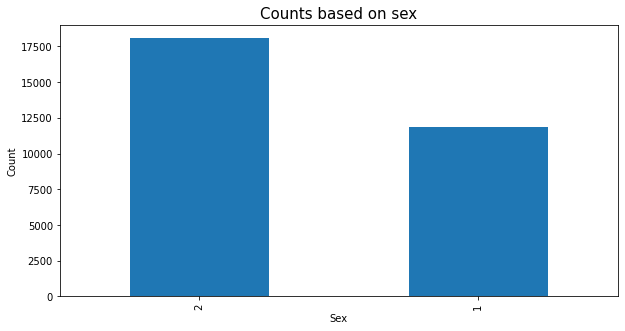

In [18]:
plt.rcParams["figure.figsize"] = (10,5)
dataset['SEX'].value_counts().plot.bar()
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts based on sex',Size=15)

In [19]:
# Replacing the sex groups to reduce bias or data insufficiency.
dataset['SEX']= dataset['SEX'].replace({1:0,2:1})
dataset['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'Conunts based on sex after replacing the groups')

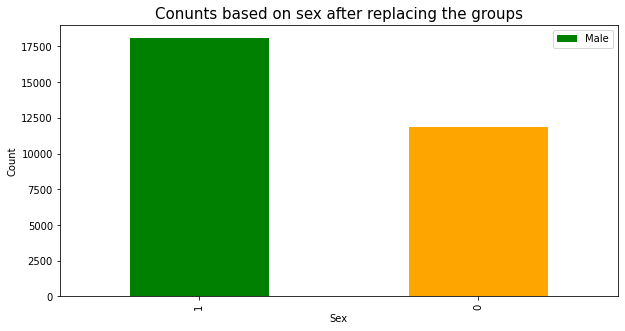

In [20]:
dataset['SEX'].value_counts().plot.bar(color=['green','orange'])
Gender=["Male","Female"]
plt.legend(Gender)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Conunts based on sex after replacing the groups',Size=15)

In [21]:
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
## Replacing the different Educational groups to reduce bias or data insufficiency.
dataset['EDUCATION']= dataset['EDUCATION'].replace({1:0,2:1,3:2,4:2,5:2,6:2})
dataset['EDUCATION'].value_counts()

1    14030
0    10599
2     5371
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'Counts of different Educational groups after replacing the groups')

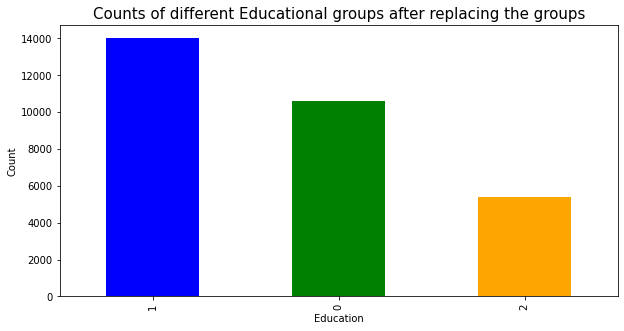

In [23]:
dataset['EDUCATION'].value_counts().plot.bar(color=['blue','green','orange'])
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Counts of different Educational groups after replacing the groups',Size=15)

In [24]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
# Replacing the different Marriage groups to reduce bias or data insufficiency.
dataset['MARRIAGE']= dataset['MARRIAGE'].replace({3:1,2:1,1:0})
dataset['MARRIAGE'].value_counts()

1    16287
0    13713
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Counts based on Marital Status after replacing groups')

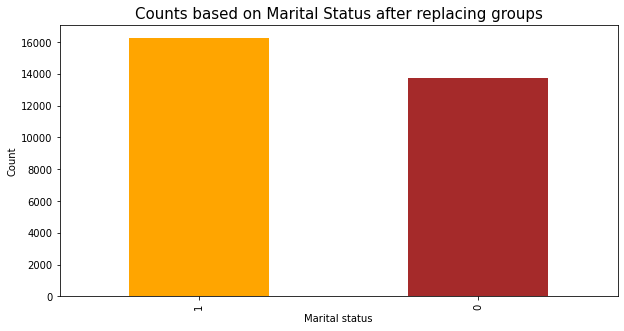

In [26]:
dataset['MARRIAGE'].value_counts().plot.bar(color=['orange','brown'])
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Counts based on Marital Status after replacing groups',Size=15)

**Counts of Target Feature**

In [27]:
dataset['Default Amount'].value_counts()

0    23364
1     6636
Name: Default Amount, dtype: int64

Text(0.5, 1.0, 'Counts of different payment groups')

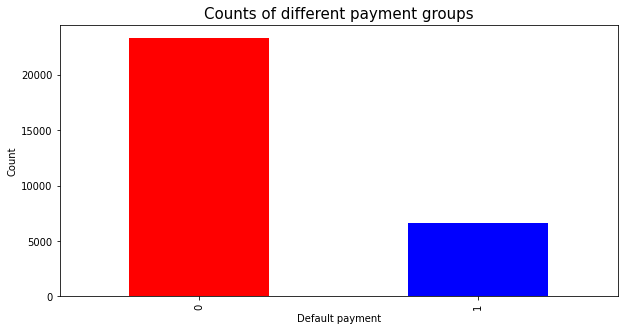

In [28]:
dataset['Default Amount'].value_counts().plot.bar(color=['red','blue'])
plt.xlabel('Default payment')
plt.ylabel('Count')
plt.title('Counts of different payment groups',Size=15)

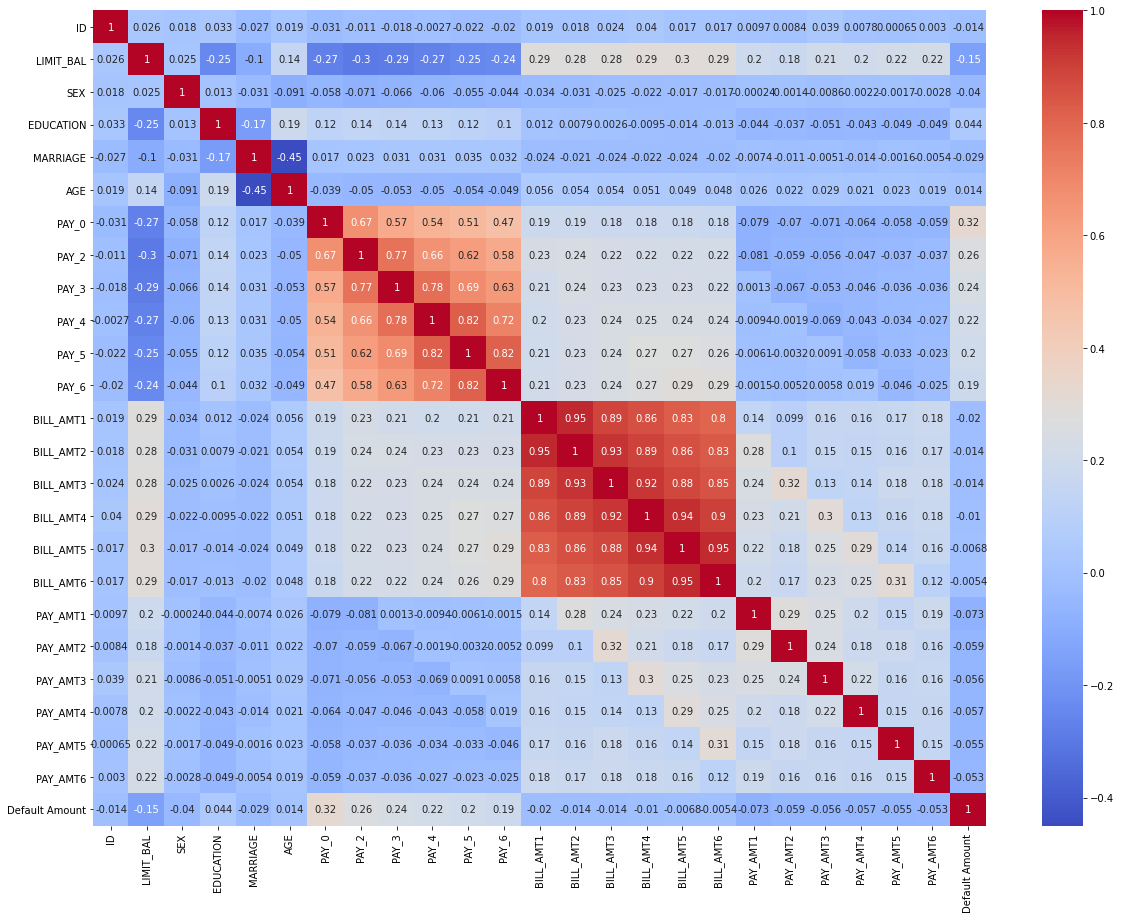

In [29]:
#Ploting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")

therefore , the above Heatmap depicts that the features like bill Amount and the montly payment is highly correlated

In [30]:
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Amount
0,1,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [31]:
# Adding a new feature "Pending bill" to the dataset which defines the  total amount of pending bills for different users.
dataset['Pending bill']=(dataset['BILL_AMT1']+dataset['BILL_AMT2']+dataset['BILL_AMT3']+dataset['BILL_AMT4']+dataset['BILL_AMT5']+dataset['BILL_AMT6'])-\
                        (dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1']+dataset['PAY_AMT1'])
dataset.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Amount,Pending bill
0,1,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,92545


In [32]:
dataset.groupby('Default Amount')['Pending bill'].sum()

Default Amount
0    5480841223
1    1595564423
Name: Pending bill, dtype: int64

In [33]:
dataset['Pending bill'].mean()

235880.1882

In [34]:
dataset.groupby('AGE')['Pending bill']

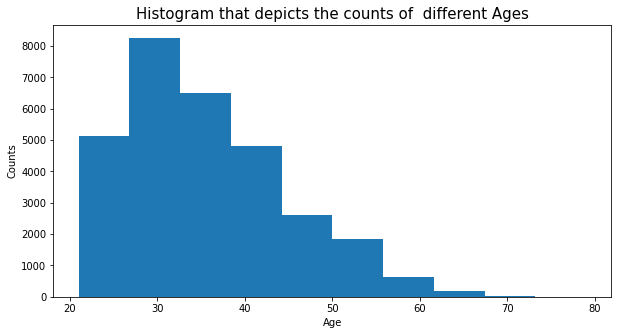

In [35]:
plt.rcParams["figure.figsize"] = (10,5)
ax = plt.subplot(111)
ax.hist(dataset['AGE'])
ax.set_title("Histogram that depicts the counts of  different Ages",size=15)
ax.set_xlabel('Age')
ax.set_ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Next Month Credit default based on age')

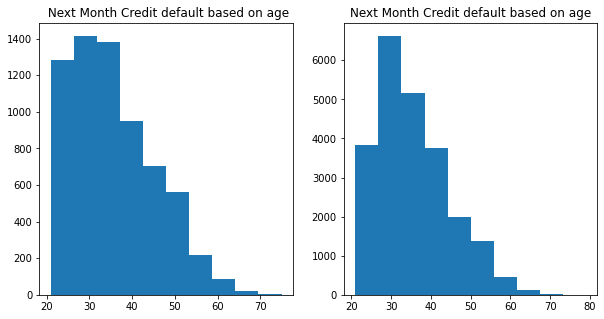

In [36]:
plt.rcParams["figure.figsize"] = (10,5)
Default = dataset[dataset['Default Amount']==1]
Not_default = dataset[dataset['Default Amount']==0]
fig,axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(Default['AGE'])
axes[0].set_title(" Next Month Credit default based on age")
axes[1].hist(Not_default['AGE'])
axes[1].set_title("Next Month Credit default based on age")

Text(0, 0.5, 'Default count')

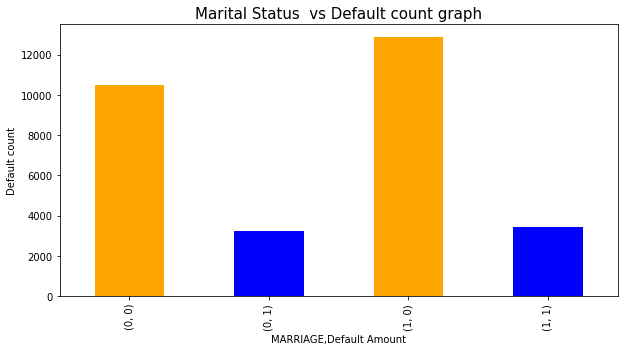

In [37]:
ax=dataset.groupby('MARRIAGE')['Default Amount'].value_counts().plot.bar(color=['orange','blue'])
ax.set_title('Marital Status  vs Default count graph',size=15)
plt.ylabel('Default count')

Text(0, 0.5, 'Default count')

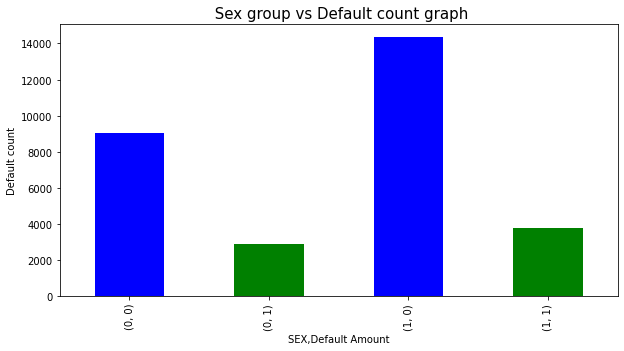

In [38]:
ax=dataset.groupby('SEX')['Default Amount'].value_counts().plot.bar(color=['blue','green'])
ax.set_title(' Sex group vs Default count graph',size=15)
plt.ylabel('Default count')

**Machine Learning Model**

In [39]:
x=dataset.drop('Default Amount',axis=1)
y=dataset['Default Amount']
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pending bill
0,1,20000,1,1,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,7704
1,2,120000,1,1,1,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,17077
2,3,90000,1,1,1,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,92545
3,4,50000,1,1,0,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,219334
4,5,50000,0,1,0,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,97339


In [40]:
# Training and Testing split of the dataset.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print('Shape of x training dataset:',x_train.shape)
print('Shape of x testing dataset:',x_test.shape)
print('Shape of y training dataset:',y_train.shape)
print('Shape of y testing dataset:',y_test.shape)

Shape of x training dataset: (22500, 25)
Shape of x testing dataset: (7500, 25)
Shape of y training dataset: (22500,)
Shape of y testing dataset: (7500,)


**Logistic Regression Model**

In [41]:
lg=LogisticRegression(max_iter=10000)
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
print(classification_report(y_train,lg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     17491
           1       0.00      0.00      0.00      5009

    accuracy                           0.78     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.60      0.78      0.68     22500



In [43]:
y_pred_train=lg.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.7772888888888889

In [44]:
y_pred_test=lg.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.7830666666666667

**Decision Tree**

In [45]:
dt= DecisionTreeClassifier(class_weight="balanced")
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
accuracy_score(y_test,dt.predict(x_test))

0.7384

**Support Vector Machine(SVM)**

In [47]:
#  class_weight='balanced' is added to  penalize the value
svc_model = SVC(class_weight='balanced', probability=True)
svc_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [48]:
svc_predict_train = svc_model.predict(x_train)
print('Accuracy score:',accuracy_score(y_train, svc_predict_train))

Accuracy score: 0.5822222222222222


In [49]:
svc_predict = svc_model.predict(x_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))

ROCAUC score: 0.6103541662589553


**Gradient Boosting Classifier**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
accuracy_score(y_train,gboost.predict(x_train))

0.8270222222222222

In [52]:
accuracy_score(y_test,gboost.predict(x_test))

0.8208

In [53]:
from sklearn.model_selection import GridSearchCV

#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [54]:
gboost2= GradientBoostingClassifier()
gb_grid =GridSearchCV(estimator=gboost2, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.8s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  15.8s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  18.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  18.9s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 26.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [55]:
accuracy_score(y_train,gb_grid.predict(x_train))

0.8484

In [56]:
accuracy_score(y_test,gb_grid.predict(x_test))

0.8165333333333333

In [58]:
import xgboost
xgb = xgboost.XGBClassifier(max_depth=10,)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
accuracy_score(y_train,xgb.predict(x_train))

0.9276444444444445

In [60]:
accuracy_score(y_test,xgb.predict(x_test))

0.8164

The accuracy of the xgboost of training dataset is higher than the test dataset(0.92 > 0.81) Hence the model is overfitted.

Hence from the above analysis: **xgboost** accuracy is more over close to **Logistic regression and decision tree.** 

In [61]:
features = pd.DataFrame(list(zip(xgb.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

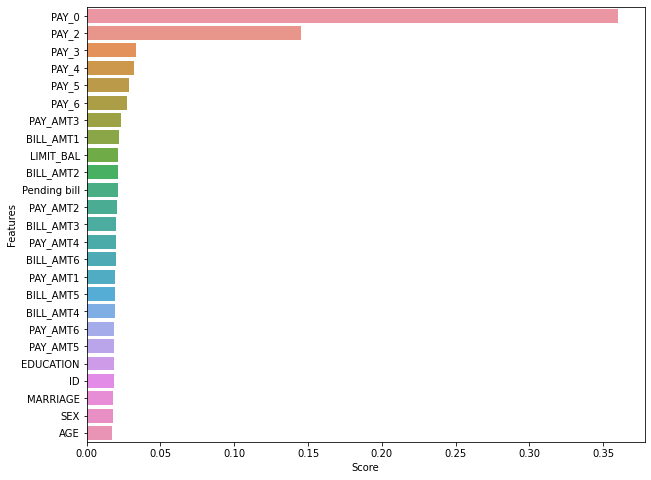

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(x=features['Score'],y=features['Features'])

In [63]:
gb_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gb_boost_with_best_perams= GradientBoostingClassifier(max_depth= 8,
 min_samples_leaf= 40,
 min_samples_split = 100,
 n_estimators = 100)
gb_boost_with_best_perams.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=100,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [66]:
explainer = shap.Explainer(gb_boost_with_best_perams,x_train)
shap_value = explainer(x_train)

100%|===================| 22487/22500 [01:59<00:00]       

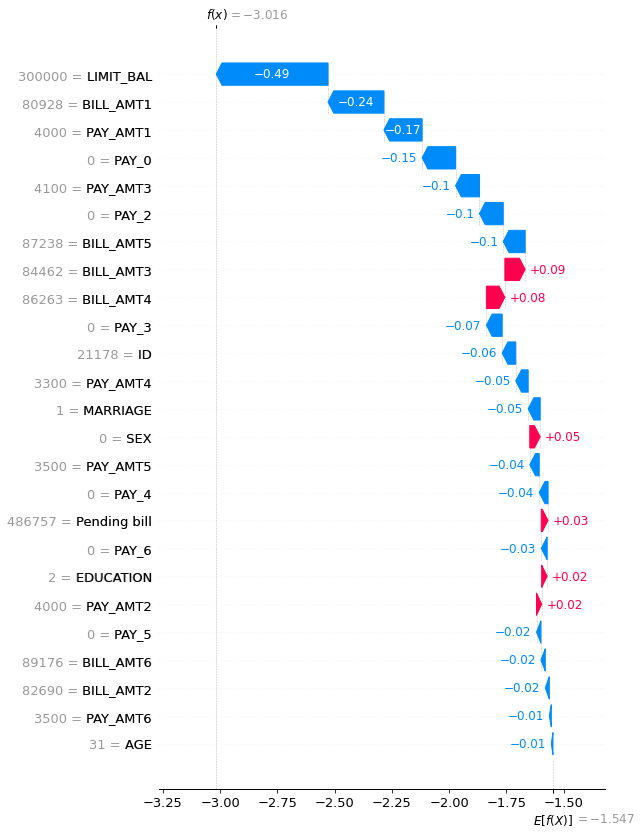

In [67]:
shap.plots.waterfall(shap_value[0],max_display=50)

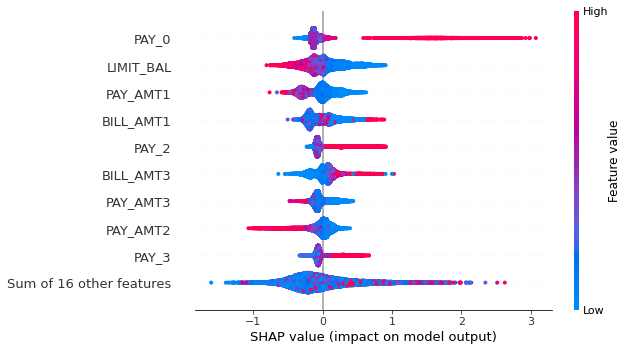

In [68]:
shap.plots.beeswarm(shap_value)